## Algoritmos de Aprendizaje automático utilizados

Una vez que hayamos definido el problema y preparado los datos, debemos aplicar algoritmos de aprendizaje automático a los datos para intentar ofrecer una solución eficiente.
Al tratarse de un problema de clasificación, orientaremos la elección de algoritmos utilizados hacia esa rama del Machine Learning. Aplicaremos los siguientes algoritmos: (Scikit-Learn, 2020)

## Voting Classifiers

#### Explicación del Voting Classifiers

Tomemos un ejemplo simple para ilustrar cómo funcionan ambos enfoques.

Imagine que tiene 3 clasificadores (1, 2, 3) y dos clases (A, B), y después del entrenamiento predice la clase de un solo punto.

----------------------------------------------------------------

**Voting Classifiers "Hard":**

Predicciones:

  -  El clasificador 1 predice la clase A

  -  El clasificador 2 predice la clase B

  -  El clasificador 3 predice la clase B

**Los clasificadores 2/3 predicen la clase B, por lo que la clase B es la decisión del conjunto.**

--------------------------------------------------------------------

**Voting Classifiers "Soft":**

Predicciones

(Esto es idéntico al ejemplo anterior, pero ahora se expresa en términos de probabilidades. Los valores se muestran solo para la clase A aquí porque el problema es binario):

   - El clasificador 1 predice la clase A con una probabilidad del 99%

   - El clasificador 2 predice la clase A con una probabilidad del 49%

   - El clasificador 3 predice la clase A con una probabilidad del 49%

**La probabilidad promedio de pertenecer a la clase A entre los clasificadores es (99 + 49 + 49) / 3 = 65.67%. Por lo tanto, la clase A es la decisión del conjunto.**

In [1]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.decomposition import PCA
# Representaciones graficas locales

%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

# Obviamos los errores de actualización 

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

# Ponemos la semilla
np.random.seed(0)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importamos la función de limpieza y preprocesado de datos
import frauddef # con solo las variables de research

In [3]:
# Importamos el dataset 
df = pd.read_csv('Explor_uscecchini28.csv')

In [4]:
# Establecemos las variables X e Y
X_train_nm, X_test_nm, y_train_nm, y_test_nm, X_train_sm, X_test_sm, y_train_sm, y_test_sm = frauddef.limpieza(df)

Using TensorFlow backend.


In [5]:
# ajustamos el parametro "n_components" que nos a indicar cuantos componentes necesitamos para explicar el 95 % de los datos
pca = PCA(n_components=0.95)

# hacemos la transofrmación del Train y Test
X_train_sm = pca.fit_transform(X_train_sm)
X_test_sm = pca.transform(X_test_sm)

# Selección del número de n_components
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  3


##### Hard Voting Classifier 1

In [6]:
# Construcción de los modelos: LogisticRegression, RandomForestClassifier y DecisionTreeClassifier.

lr_hard = LogisticRegression()
lr_hard.fit(X_train_sm, y_train_sm)
RandomForestClassifier_hard = RandomForestClassifier()
RandomForestClassifier_hard.fit(X_train_sm, y_train_sm)
dt_hard = DecisionTreeClassifier()
dt_hard.fit(X_train_sm, y_train_sm)

# Ajuste del sistema de votación, especificamos que el método de votación será "Hard"
estimators_hard_2 = [('lr', lr_hard), ('rf', RandomForestClassifier_hard), 
                                               ('dt', dt_hard)]

voting_clf_hard = VotingClassifier(estimators= estimators_hard_2,  voting='hard')
voting_clf_hard.fit(X_train_sm, y_train_sm)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())])

- Nombre del Modelo: LogisticRegression 
 
 - Precisión: 0.6187317590872911 | 
 - Exactitud: 0.7627302275189599 | 
 - Exhaustividad: 0.36628511966701355 | 
 - F1: 0.49490333919156426 | 
 - AUC: 0.6238572322753043 |
 
 - Matriz de confusion: 
 [[1628  219]
 [1218  704]] 

- Nombre del Modelo: RandomForestClassifier 
 
 - Precisión: 0.9188113557972937 | 
 - Exactitud: 0.9027916251246261 | 
 - Exhaustividad: 0.9422476586888657 | 
 - F1: 0.9220977596741344 | 
 - AUC: 0.9183355239843896 |
 
 - Matriz de confusion: 
 [[1652  195]
 [ 111 1811]] 

- Nombre del Modelo: DecisionTreeClassifier 
 
 - Precisión: 0.8936057309631202 | 
 - Exactitud: 0.8866293848500254 | 
 - Exhaustividad: 0.9073881373569199 | 
 - F1: 0.8968886603239906 | 
 - AUC: 0.893325904087231 |
 
 - Matriz de confusion: 
 [[1624  223]
 [ 178 1744]] 

- Nombre del Modelo: VotingClassifier 
 
 - Precisión: 0.9036879808967896 | 
 - Exactitud: 0.9020113460546674 | 
 - Exhaustividad: 0.9099895941727367 | 
 - F1: 0.905982905982906 | 


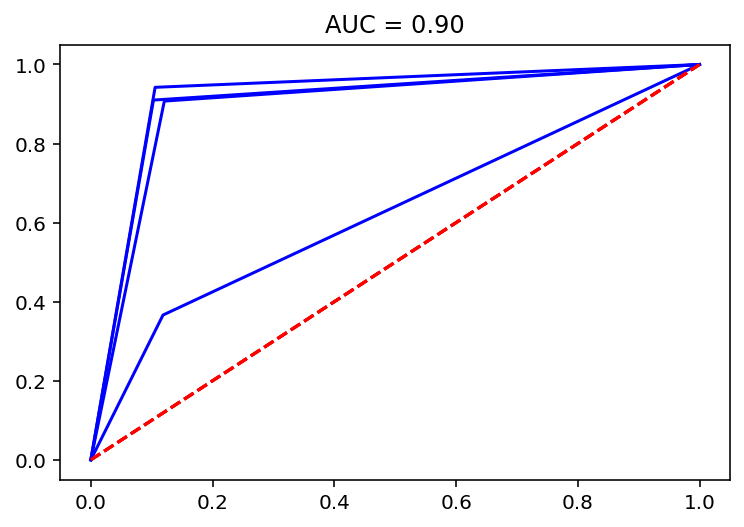

In [7]:
# Medicion del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.

for clf in (lr_hard, RandomForestClassifier_hard, dt_hard, voting_clf_hard):
    clf.fit(X_train_sm, y_train_sm)
    y_test_pred = clf.predict(X_test_sm)
    y_train_pred = clf.predict(X_train_sm)
    cm = confusion_matrix(y_test_sm, y_test_pred)
    false_positive_rate, recall, thresholds = roc_curve(y_test_sm, y_test_pred) # el area bajo la curva
    roc_auc = auc(false_positive_rate, recall)
    
    print("- Nombre del Modelo: {} \n" .format(clf.__class__.__name__) , "\n - Precisión: {} |" 
          .format(accuracy_score(y_test_sm, y_test_pred)), 
          "\n - Exactitud: {} |" .format(precision_score(y_test_sm, y_test_pred)), 
          "\n - Exhaustividad: {} |" .format(recall_score(y_test_sm, y_test_pred)), 
          "\n - F1: {} |" .format(f1_score(y_test_sm, y_test_pred)), 
          "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
          "\n - Matriz de confusion: \n {} \n" .format(cm))
    
    # Representamos gráficamente AUC
    plot(false_positive_rate, recall, 'b') # imprimir el ratio
    plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
    title('AUC = %0.2f' % roc_auc)

-----------------------------------------------
####  Random Forest Classifier Feature Importance

Como el mejor modelo es el de **”Random Forest Classifier”**, vamos a ver que variables son las que tienen mayor impacto en la predicción. Usaremos **"Feature Importance"**

Feature: 0, Score: 0.33384
Feature: 1, Score: 0.37680
Feature: 2, Score: 0.28936


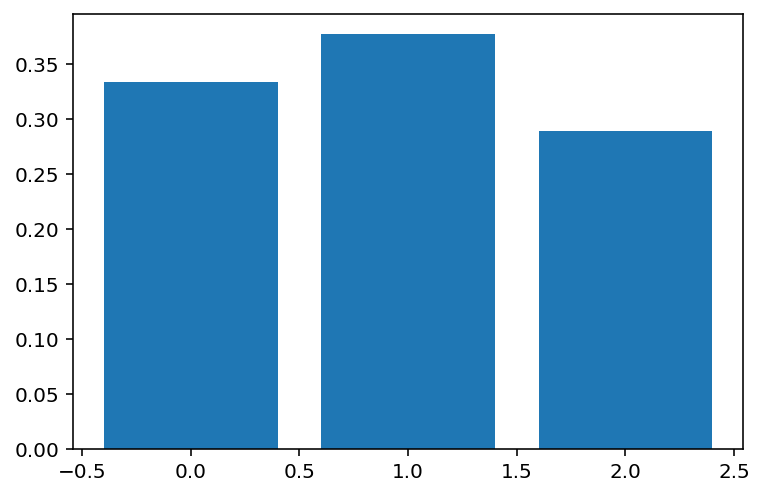

In [8]:
importance = RandomForestClassifier_hard.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
# Fijamos los valores de los distintos medidores de rendimiento para usarlos en una tabla comparativa. 

report_table_1 = ['Hard Voting Classifier With Smote PCA', '',accuracy_score(y_train_sm, y_train_pred), 
                  accuracy_score(y_test_sm, y_test_pred), recall_score(y_test_sm, y_test_pred),
                 f1_score(y_test_sm, y_test_pred), auc(false_positive_rate, recall)]

##### Soft Voting Classifier 1

In [10]:
# Construcción de los modelos: LogisticRegression, RandomForestClassifier y DecisionTreeClassifier.

lr_soft = LogisticRegression()
lr_soft.fit(X_train_sm, y_train_sm)
RandomForestClassifier_soft = RandomForestClassifier()
RandomForestClassifier_soft.fit(X_train_sm, y_train_sm)
dt_soft = DecisionTreeClassifier()
dt_soft.fit(X_train_sm, y_train_sm)


# Ajuste del sistema de votación, especificamos que el método de votación será "Soft"
estimators_soft_2 = [('lr', lr_soft), ('rf', RandomForestClassifier_soft), ('dt', dt_soft)]

voting_clf_soft = VotingClassifier(estimators= estimators_soft_2, voting='soft')
voting_clf_soft.fit(X_train_sm, y_train_sm)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

- Nombre del Modelo: LogisticRegression 
 
 - Precisión: 0.6187317590872911 | 
 - Exactitud: 0.7627302275189599 | 
 - Exhaustividad: 0.36628511966701355 | 
 - F1: 0.49490333919156426 | 
 - AUC: 0.6238572322753043 |
 
 - Matriz de confusion: 
 [[1628  219]
 [1218  704]] 

- Nombre del Modelo: RandomForestClassifier 
 
 - Precisión: 0.9201379676306712 | 
 - Exactitud: 0.9002469135802469 | 
 - Exhaustividad: 0.9484911550468262 | 
 - F1: 0.9237395490245756 | 
 - AUC: 0.9195623073555734 |
 
 - Matriz de confusion: 
 [[1645  202]
 [  99 1823]] 

- Nombre del Modelo: DecisionTreeClassifier 
 
 - Precisión: 0.8941363756964712 | 
 - Exactitud: 0.8871377732587697 | 
 - Exhaustividad: 0.9079084287200833 | 
 - F1: 0.8974029313448189 | 
 - AUC: 0.8938567590270692 |
 
 - Matriz de confusion: 
 [[1625  222]
 [ 177 1745]] 

- Nombre del Modelo: VotingClassifier 
 
 - Precisión: 0.8949323427964977 | 
 - Exactitud: 0.8845766129032258 | 
 - Exhaustividad: 0.913111342351717 | 
 - F1: 0.8986175115207373 | 

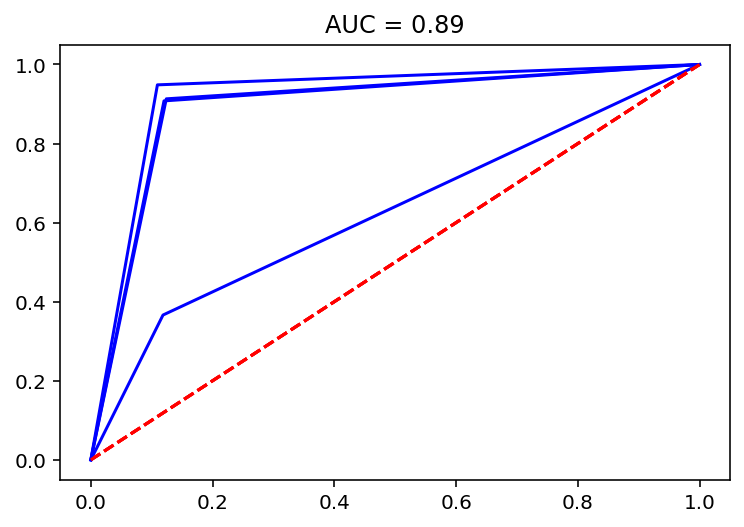

In [11]:
# Medicion del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.

for clf in (lr_soft, RandomForestClassifier_soft, dt_soft, voting_clf_soft):
    clf.fit(X_train_sm, y_train_sm)
    y_test_pred = clf.predict(X_test_sm)
    y_train_pred = clf.predict(X_train_sm)
    cm = confusion_matrix(y_test_sm, y_test_pred)
    false_positive_rate, recall, thresholds = roc_curve(y_test_sm, y_test_pred) # el area bajo la curva
    roc_auc = auc(false_positive_rate, recall)
    
    print("- Nombre del Modelo: {} \n" .format(clf.__class__.__name__) , "\n - Precisión: {} |" 
          .format(accuracy_score(y_test_sm, y_test_pred)), 
          "\n - Exactitud: {} |" .format(precision_score(y_test_sm, y_test_pred)), 
          "\n - Exhaustividad: {} |" .format(recall_score(y_test_sm, y_test_pred)), 
          "\n - F1: {} |" .format(f1_score(y_test_sm, y_test_pred)), 
          "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
          "\n - Matriz de confusion: \n {} \n" .format(cm))
    
    # Representamos gráficamente AUC
    plot(false_positive_rate, recall, 'b') # imprimir el ratio
    plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
    title('AUC = %0.2f' % roc_auc)

In [12]:
# Fijamos los valores de los distintos medidores de rendimiento para usarlos en una tabla comparativa. 

report_table_2 = ['Soft Voting Classifier With Smote PCA', '',accuracy_score(y_train_sm, y_train_pred), 
                  accuracy_score(y_test_sm, y_test_pred), recall_score(y_test_sm, y_test_pred),
                 f1_score(y_test_sm, y_test_pred), auc(false_positive_rate, recall)]

Feature: 0, Score: 0.33470
Feature: 1, Score: 0.37596
Feature: 2, Score: 0.28934


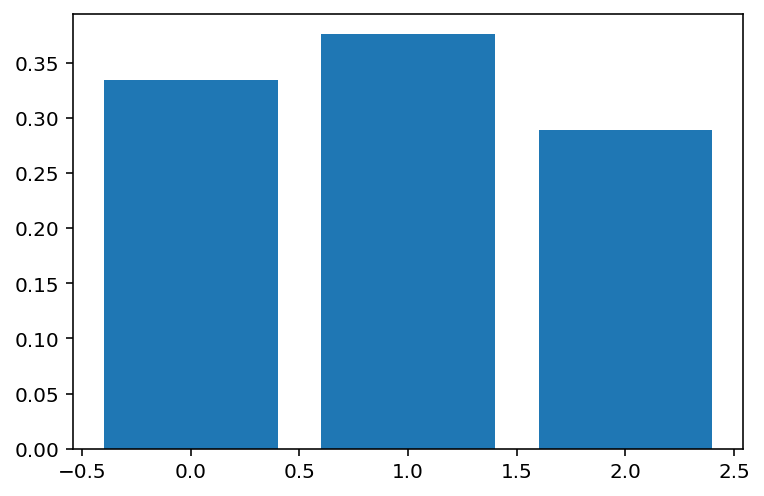

In [13]:
importance = RandomForestClassifier_soft.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Voting: Generating a Report table

Para comparar todos los modelos, creemos una tabla y un diagrama.

In [14]:
# Construcción de la tabla con los distintos medidores de rendimiento para usarlos en una tabla comparativa. 
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2))).transpose()


In [15]:
# Mostrar la Medición del rendimiento de los modelos en una tabla.
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score', "Exhaustividad", "F1", "AUC"]
report_table.index = report_table['Model Name']
report_table.head(4)

,Model Name,Model Parameter,Training Score,Testing Score,Exhaustividad,F1,AUC
Model Name,,,,,,,
Hard Voting Classifier With Smote PCA,Hard Voting Classifier With Smote PCA,,1,0.903688,0.90999,0.905983,0.90356
Soft Voting Classifier With Smote PCA,Soft Voting Classifier With Smote PCA,,1,0.894932,0.913111,0.898618,0.894563


In [16]:
# guardamos los resultados
report_table.to_csv('Voting Classifiers With Smote PCA.csv')

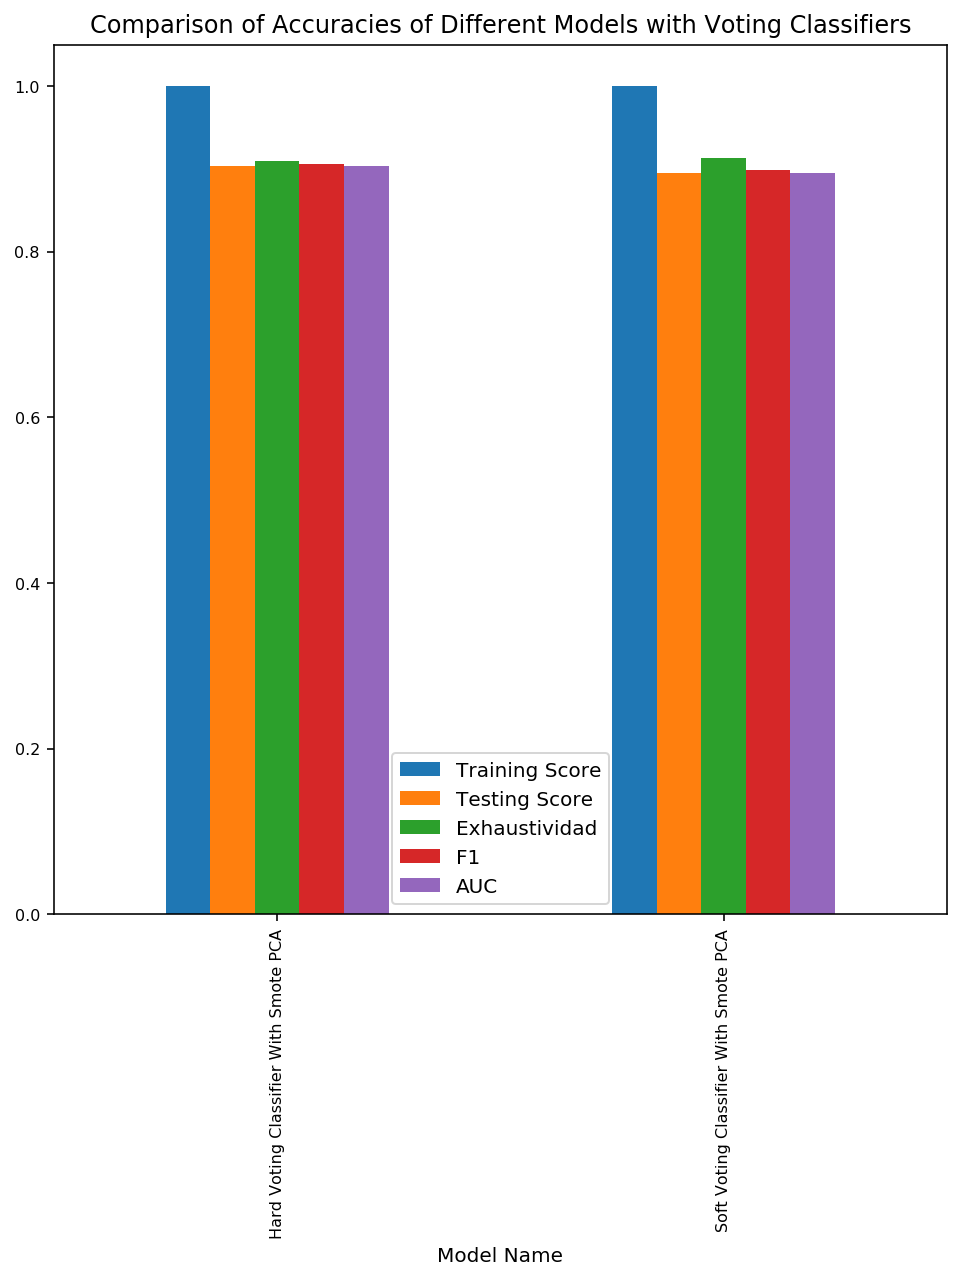

tornado.application - ERROR - Exception in callback functools.partial(<function Kernel.enter_eventloop.<locals>.advance_eventloop at 0x000001F63DF52558>)
Traceback (most recent call last):
  File "C:\Users\Hicham\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Hicham\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 314, in advance_eventloop
    eventloop(self)
TypeError: 'NoneType' object is not callable


In [17]:
ax = report_table[['Model Name', 'Model Parameter', 'Training Score', 'Testing Score', "Exhaustividad", "F1", "AUC"]].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models with Voting Classifiers", figsize=(8, 8), fontsize = 8)
plt.show()